<a href="https://colab.research.google.com/github/igolynker/NGG605/blob/main/HW_20231002_IG_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1 + Q2

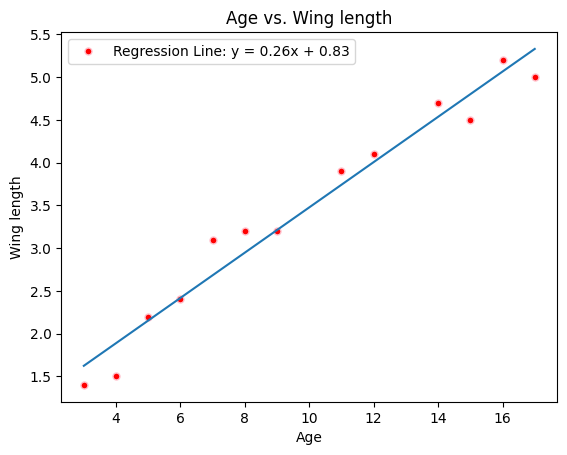

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm

x_list = [3, 4, 5, 6, 7, 8, 9, 11,12, 14,15,16, 17] #age
y_list = [1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2 ,3.9 ,4.1 ,4.7 ,4.5 ,5.2 ,5] # wing length

#the code gave out error message when plotting regression line becaue can't multiply "Sequence" by non-int float so convert list to array
x = np.array([3, 4, 5, 6, 7, 8, 9, 11,12, 14,15,16, 17])
y = np.array([1.4, 1.5, 2.2, 2.4, 3.1, 3.2, 3.2 ,3.9 ,4.1 ,4.7 ,4.5 ,5.2 ,5])

#1. plotting the points
plt.plot(x, y, color='pink', linewidth = False, marker='.', markerfacecolor='red', markersize=10)
plt.xlabel('Age')
plt.ylabel('Wing length')

# giving a title to my graph
plt.title('Age vs. Wing length')

#2. Calculate and plot regression line using NumPy’s polyfit() function to calculate the slope and y-intercept of the regression line.

m, b = np.polyfit(x,y, 1)
plt.plot(x, m*x + b)
plt.legend(['Regression Line: y = {:.2f}x + {:.2f}'.format(m, b)])

# function to show the plot
plt.show()



Q3

In [2]:
#3 3. Can you reject H0: b = 0?
# to calculate F statistic use import statsmodels.api as sm
# prompted ChatGPT with "which function in python can be used to do F statistics to support or refute a regression model slope null hypothesis?"
# adapted response after importing the stats.anova and .api method from statsmodels.stats.anova import anova_lm:

# Add a constant (intercept) term to the independent variable
X = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, X).fit()


# Extract ststistic information generated by sm.OLS fitted model

#print(model.summary())  # Summary statistics in a formatted table
params = model.params  # Estimated coefficients (intercept(denoted 'const'), and slope (denoted 'x1' in summary table))
rsquared = model.rsquared  # R-squared value
print(rsquared)
fvalue = model.fvalue  # F-statistic
print("F-statistics value: ", fvalue)
f_pvalue = model.f_pvalue  # P-value associated with the F-statistic
print("P-value of F-statistics: ", f_pvalue)
conf_int = model.conf_int(0.05)  # Confidence intervals at alpha = 0.05 for coefficients (intercept and slope)
print("Confidence Intervals of Intercept: ", conf_int[0])
print("confidence Intervals of Slope: ", conf_int[1])

# Extract the slope and intercept coefficients
intercept = model.params[0]
slope = model.params[1]

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the equation
print("Regression Equation:")
print(equation)

#create an if/else loop to reject the null hypothesis is f_pvalue < 0.05
if f_pvalue < 0.05:
    print(f"3.Can you reject the null hypothesis? YES, p-value < 0.05 (p = {f_pvalue})")
else:
    print(f"3.Failed to reject null hypothesis, p-value > 0.05 (p = {f_pvalue})")

0.9633822518042857
F-statistics value:  289.4007767273745
P-value of F-statistics:  3.0097431724570654e-09
Confidence Intervals of Intercept:  [0.46042944 1.19881928]
confidence Intervals of Slope:  [0.23043928 0.29892896]
Regression Equation:
y = 0.26x + 0.83
3.Can you reject the null hypothesis? YES, p-value < 0.05 (p = 3.0097431724570654e-09)


Q4

Confidence Intervals of Intercept:  [0.46042944 1.19881928]
confidence Intervals of Slope:  [0.23043928 0.29892896]


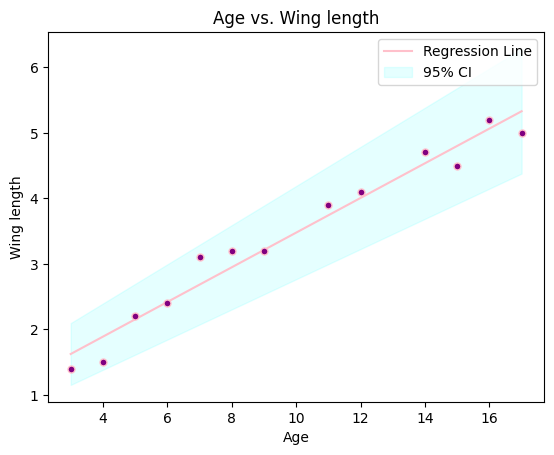

In [3]:
# 4. Calculate and plot the confidence intervals on the slope of the regression.
# refer back to the data extracted in Q3

conf_int = model.conf_int(0.05)  # Confidence intervals at alpha = 0.05 for coefficients (intercept and slope)
print("Confidence Intervals of Intercept: ", conf_int[0])
print("confidence Intervals of Slope: ", conf_int[1])

# Plot the confidence intervals (intercept added to the slope) for the regression line
x_range = np.linspace(min(x), max(x), 100)
y_predicted = intercept + slope * x_range #calculates y value for every x point in the graph's range using the regression equasion
plt.plot(x_range, y_predicted, color='pink', label='Regression Line')

# Plot the confidence intervals for the regression line
lower_bound = conf_int[0][0] + conf_int[1][0] * x_range
upper_bound = conf_int[0][1] + conf_int[1][1] * x_range
plt.fill_between(x_range, lower_bound, upper_bound, alpha=0.1, color='cyan', label='95% CI')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

#1. plotting the points
plt.plot(x, y, color='pink', linewidth = False, marker='.', markerfacecolor='purple', markersize=10)
plt.xlabel('Age')
plt.ylabel('Wing length')

# giving a title to my graph
plt.title('Age vs. Wing length')

# Show the plot
plt.show()

Q5

In [4]:
# 5. We can extract R^2 from Q3, using the data provided by the sm.OLS regression model

rsquared = model.rsquared  # R-squared value
print("R-squared using model.rsquared: ", rsquared)
# Or we can manually calculate using the formula R^2 = 1-(SSR/SST) where SSR = square of "residuals", or square of the the sum of distance from regression line and data points and SST = square of the distance from the mean
# Calculate SSR (Sum of Squared Residuals) for each x point

y_hat = intercept + slope * x #calculating y values for each x value using our regression line
ssr = np.sum((y - y_hat) ** 2)

# Calculate SST (Total Sum of Squares)
sst = np.sum((y - np.mean(y)) ** 2)

# Calculate R-squared manually
rsquared_manual = 1 - (ssr / sst)

# Print the manually calculated R-squared value
print("Manually Calculated R-squared:", rsquared_manual)


R-squared using model.rsquared:  0.9633822518042857
Manually Calculated R-squared: 0.9633822518042857


Q6

In [6]:
#6. Calculate Pearson's r

correlation_matrix = np.corrcoef(x, y)

# print out only the second value of the first row of the matrix (the first is just 1)
pearson_function = correlation_matrix[0, 1]
print("Pearson Correlation Coefficient:", pearson_function)


Pearson Correlation Coefficient: 0.9815203776816279


Q7

R^2:  0.08715783622001205
F-statistics value:  1.0502759802966402
P-value of F-statistics:  0.32745303177344126
Confidence Intervals of Intercept:  [-1.95124714  4.56330699]
confidence Intervals of Slope:  [-0.16145137  0.44280903]
Regression Equation:
y = 0.14x + 1.31


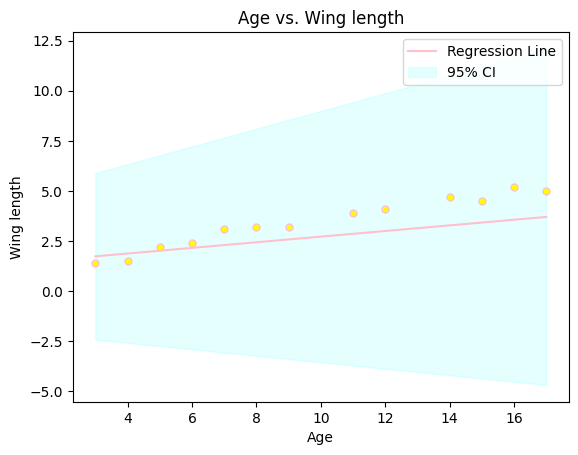

In [11]:

#7. Add some noise to the data and see how the regression changes.
noise = np.random.normal(0,2, len(x)) #mean = 0, variance = 2, for the same lengthb as array x
y_noise = y + noise

# Add a constant (intercept) term to the independent variable
X_2 = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y_noise, X_2).fit()

# Calculate the F-statistic and associated p-value

# Extract ststistic information generated by sm.OLS fitted model

#print(model.summary())  # Summary statistics in a formatted table
params = model.params  # Estimated coefficients (intercept(denoted 'const'), and slope (denoted 'x1' in summary table))
rsquared = model.rsquared  # R-squared value
print("R^2: ", rsquared)
fvalue = model.fvalue  # F-statistic
print("F-statistics value: ", fvalue)
f_pvalue = model.f_pvalue  # P-value associated with the F-statistic
print("P-value of F-statistics: ", f_pvalue)
conf_int = model.conf_int(0.05)  # Confidence intervals at alpha = 0.05 for coefficients (intercept and slope)
print("Confidence Intervals of Intercept: ", conf_int[0])
print("confidence Intervals of Slope: ", conf_int[1])

# Extract the slope and intercept coefficients
intercept = model.params[0]
slope = model.params[1]

# Create the equation string
equation = f"y = {slope:.2f}x + {intercept:.2f}"

# Print the equation
print("Regression Equation:")
print(equation)

#Calculate confidence intervals
conf_int = model.conf_int(0.05)  # Confidence intervals at alpha = 0.05 for coefficients (intercept and slope)

# Plot the confidence intervals (intercept added to the slope) for the regression line
x_range = np.linspace(min(x), max(x), 100)
y_predicted = intercept + slope * x_range #calculates y value for every x point in the graph's range using the regression equasion
plt.plot(x_range, y_predicted, color='pink', label='Regression Line')

# Plot the confidence intervals for the regression line
lower_bound = conf_int[0][0] + conf_int[1][0] * x_range
upper_bound = conf_int[0][1] + conf_int[1][1] * x_range
plt.fill_between(x_range, lower_bound, upper_bound, alpha=0.1, color='cyan', label='95% CI')

# Set labels and legend
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

#1. plotting the points
plt.plot(x, y, color='pink', linewidth = False, marker='.', markerfacecolor='yellow', markersize=10)
plt.xlabel('Age')
plt.ylabel('Wing length')

# giving a title to my graph
plt.title('Age vs. Wing length')

# Show the plot
plt.show()